In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression


In [14]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [15]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [16]:
#checking for categorical and numerical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [17]:
#creating a copy of the data
df_copy = df.copy()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\3142557533.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


<AxesSubplot: xlabel='charges', ylabel='Density'>

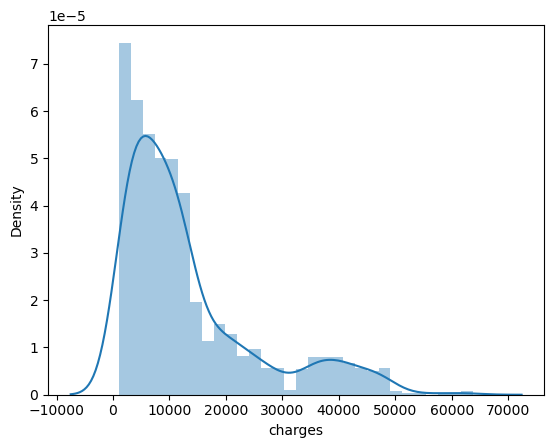

In [18]:
#charges distribution
sns.distplot(df['charges'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\3638475583.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


<AxesSubplot: xlabel='age', ylabel='Density'>

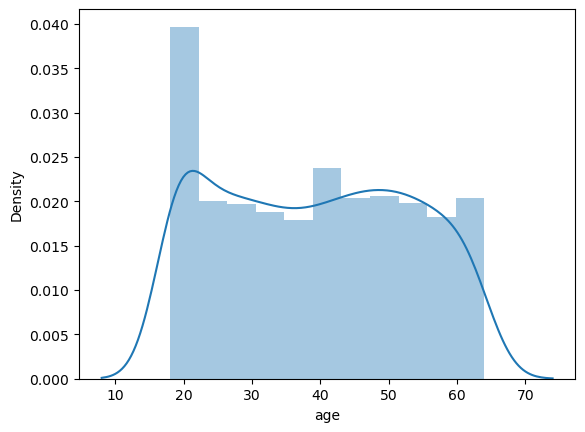

In [19]:
#age analysis
sns.distplot(df['age'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\319761948.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<AxesSubplot: xlabel='bmi', ylabel='Density'>

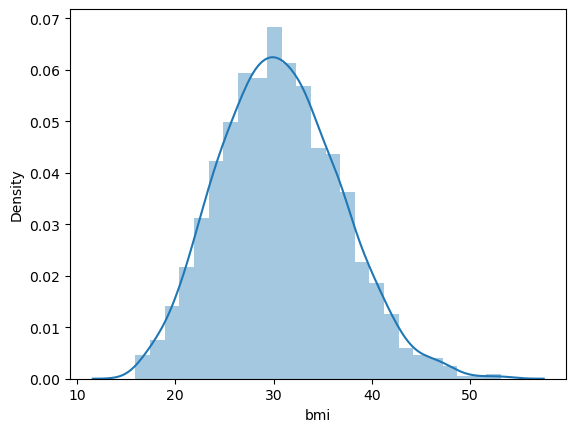

In [20]:
#bmi analysis
sns.distplot(df['bmi'])


<AxesSubplot: xlabel='age', ylabel='bmi'>

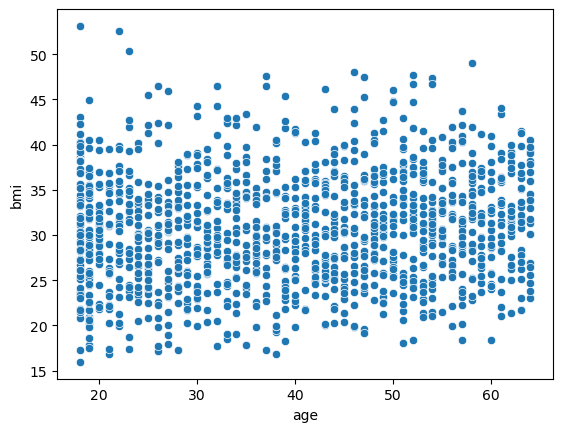

In [21]:
#correlation between age and bmi
sns.scatterplot(x='age', y='bmi', data=df)


<AxesSubplot: >

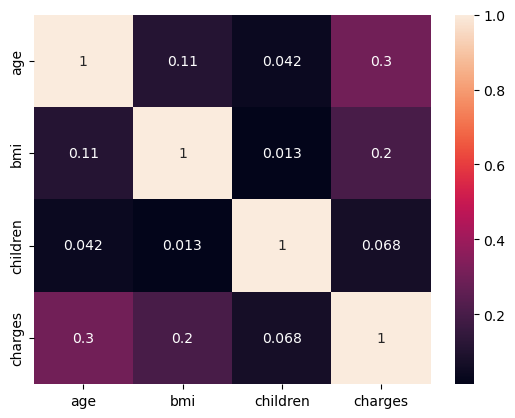

In [22]:
#correlation heatmap
sns.heatmap(df.corr(), annot=True)


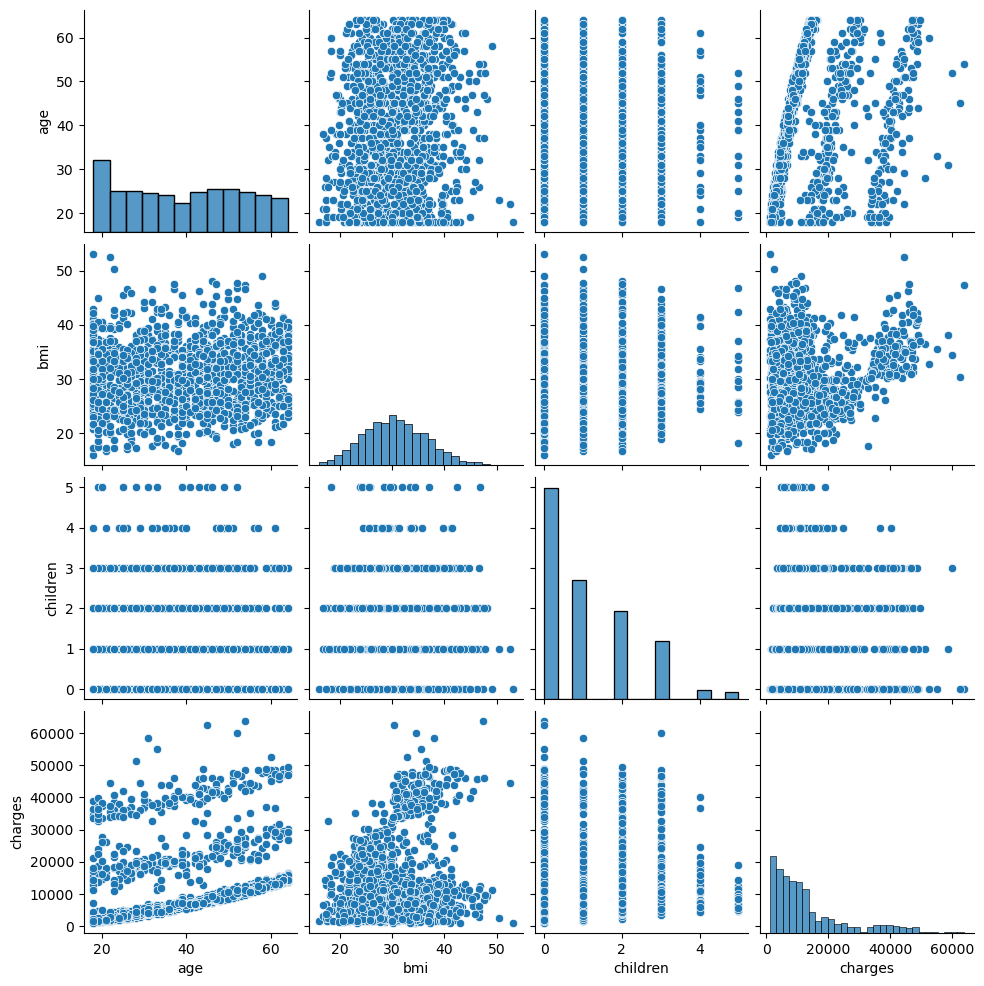

In [23]:
#pairplot
sns.pairplot(df)


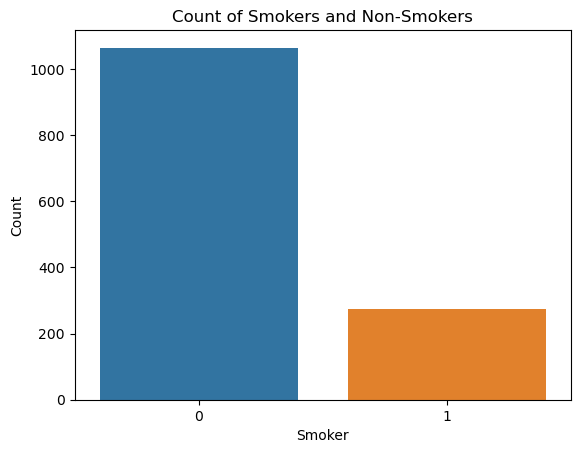

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df'

# Convert 'smoker' column to numerical values
df['smoker_numeric'] = df['smoker'].map({'yes': 1, 'no': 0})

# Create the count plot using the numerical column
sns.countplot(data=df, x='smoker_numeric')

# Add labels and title
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Count of Smokers and Non-Smokers')

# Show the plot
plt.show()

<AxesSubplot: xlabel='smoker', ylabel='charges'>

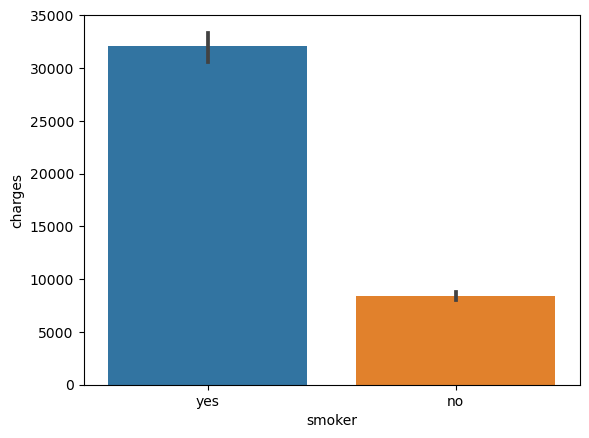

In [26]:
#smoker vs charges
sns.barplot(x='smoker', y='charges', data=df)


In [27]:
#encoding categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le = LabelEncoder()
le.fit(df.sex.drop_duplicates()) 
df.sex = le.transform(df.sex)

le.fit(df.smoker.drop_duplicates()) 
df.smoker = le.transform(df.smoker)

le.fit(df.region.drop_duplicates()) 
df.region = le.transform(df.region)


In [28]:
df.head()


,age,sex,bmi,children,smoker,region,charges,smoker_numeric
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,0
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,0


<AxesSubplot: >

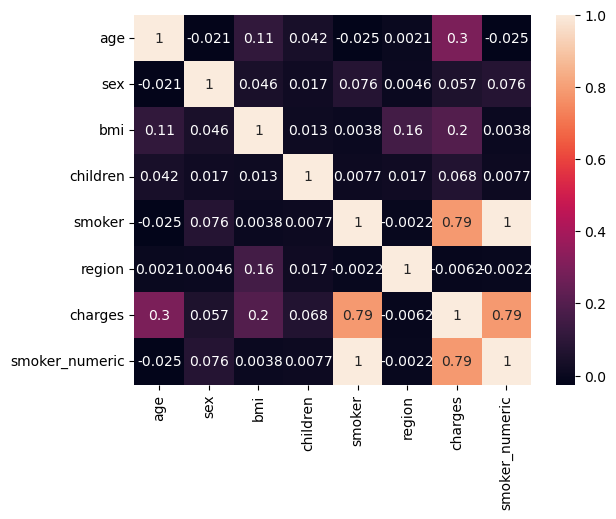

In [29]:
#corr heatmap
sns.heatmap(df.corr(), annot=True)


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\3430629845.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['smoker']==1]['charges'], label='smoker')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\3430629845.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['s

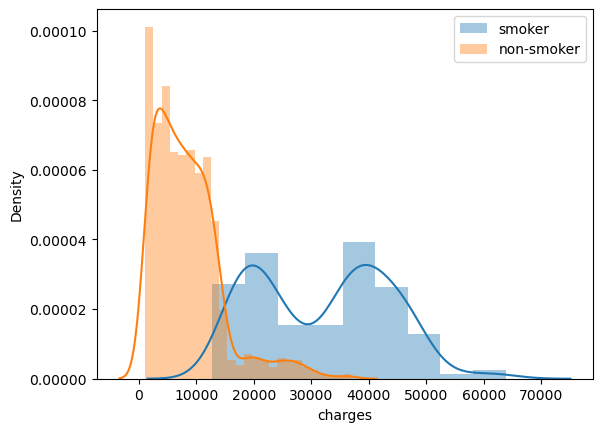

In [30]:
#distribution of charges for smokers and non-smokers
sns.distplot(df[df['smoker']==1]['charges'], label='smoker')
sns.distplot(df[df['smoker']==0]['charges'], label='non-smoker')
plt.legend()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\572598372.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['smoker']==1]['bmi'], label='smoker')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\572598372.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['smoker'

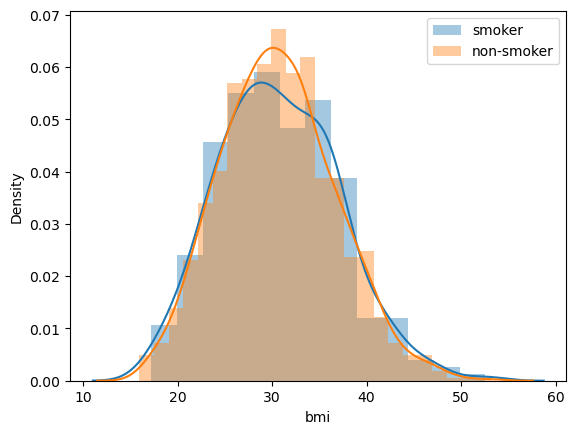

In [31]:
#distribution of bmi for smokers and non-smokers
sns.distplot(df[df['smoker']==1]['bmi'], label='smoker')
sns.distplot(df[df['smoker']==0]['bmi'], label='non-smoker')
plt.legend()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\2896117696.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['smoker']==1]['age'], label='smoker')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\2896117696.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['smoke

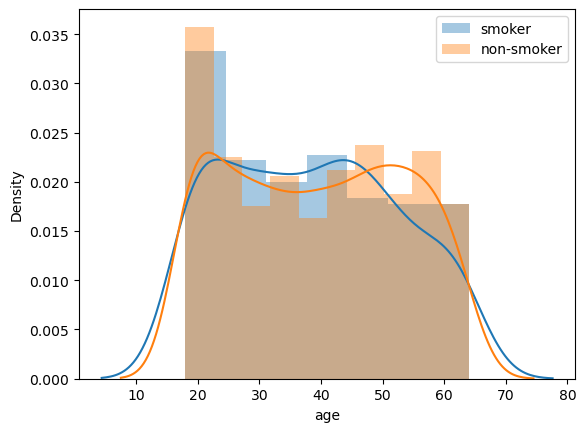

In [32]:
#distribution of age for smokers and non-smokers
sns.distplot(df[df['smoker']==1]['age'], label='smoker')
sns.distplot(df[df['smoker']==0]['age'], label='non-smoker')
plt.legend()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\3980777836.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['smoker']==1]['sex'], label='smoker')
C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\3980777836.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['smoke

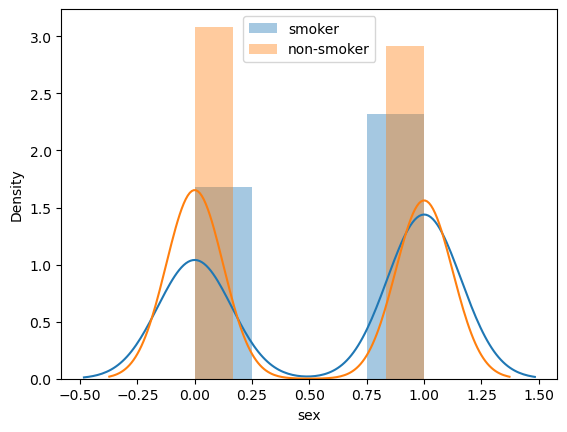

In [33]:
#distribution of sex for smokers and non-smokers
sns.distplot(df[df['smoker']==1]['sex'], label='smoker')
sns.distplot(df[df['smoker']==0]['sex'], label='non-smoker')
plt.legend()

<AxesSubplot: xlabel='smoker', ylabel='charges'>

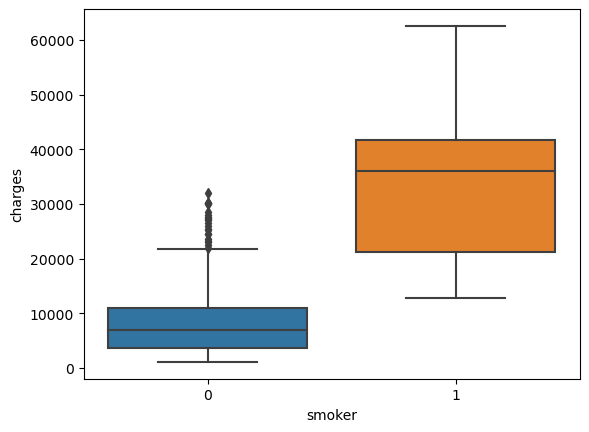

In [34]:
#box plot for charges for smoker and non smoker men
sns.boxplot(x='smoker', y='charges', data=df[df['sex']==1])


<AxesSubplot: xlabel='smoker', ylabel='charges'>

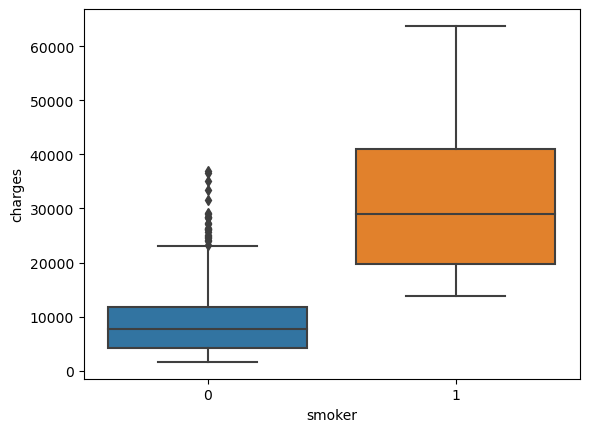

In [35]:
#box plot for charges for smoker and non smoker women
sns.boxplot(x='smoker', y='charges', data=df[df['sex']==0])

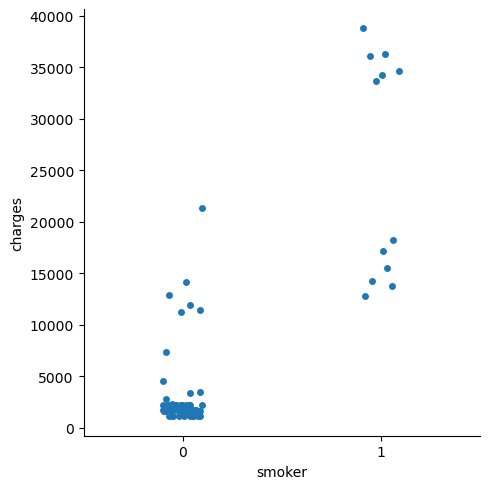

In [36]:
#cat plot for smoker and non smoker 18 year olds
sns.catplot(x='smoker', y='charges', data=df[df['age']==18])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\2651807532.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


<AxesSubplot: xlabel='bmi', ylabel='Density'>

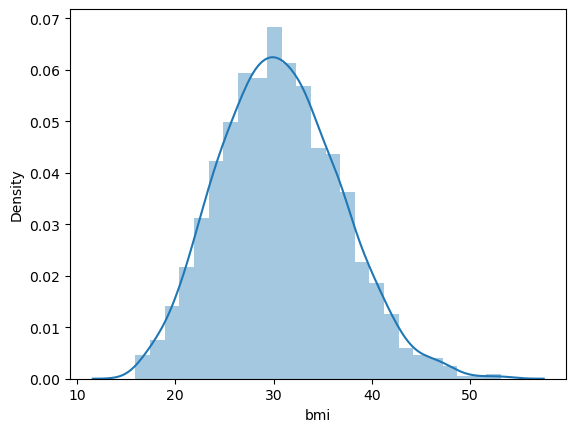

In [37]:
#bmi distribution
sns.distplot(df['bmi'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\1334911548.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['bmi']>30]['charges'])


<AxesSubplot: xlabel='charges', ylabel='Density'>

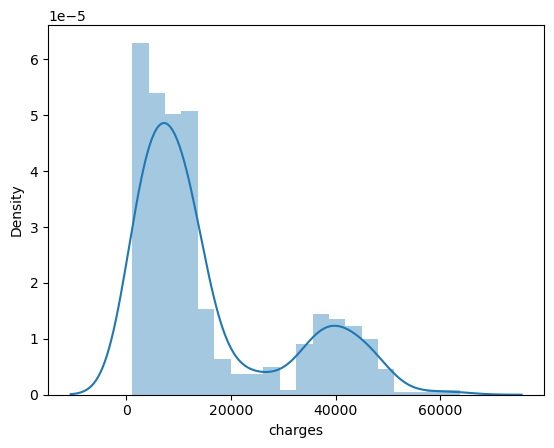

In [38]:
#charges distribution for people with bmi > 30
sns.distplot(df[df['bmi']>30]['charges'])

C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\2439437154.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['bmi']<30]['charges'])


<AxesSubplot: xlabel='charges', ylabel='Density'>

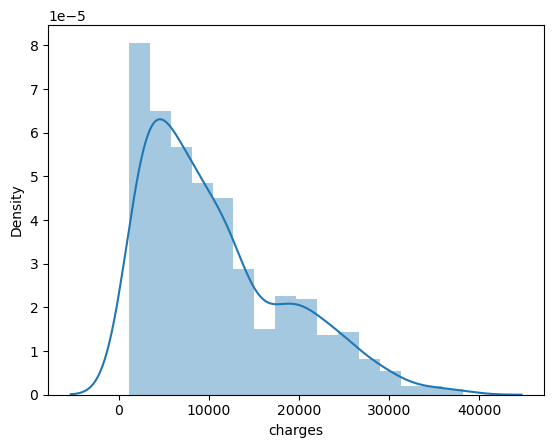

In [39]:
#charges distribution for people with bmi < 30
sns.distplot(df[df['bmi']<30]['charges'])


<AxesSubplot: xlabel='bmi', ylabel='charges'>

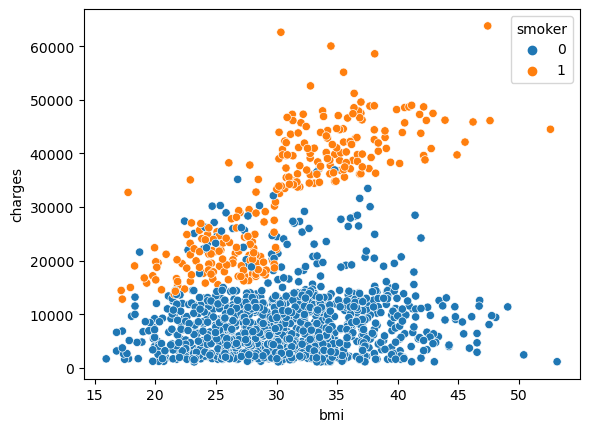

In [40]:
#scatter plot for bmi and charges for smokers and non smokers
sns.scatterplot(x='bmi', y='charges', hue='smoker', data=df)


<AxesSubplot: ylabel='count'>

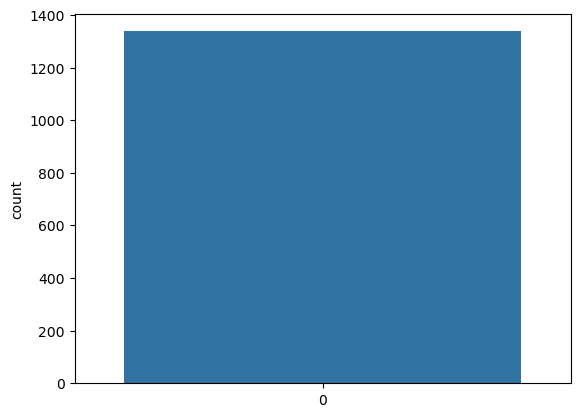

In [41]:
#children analysis
sns.countplot(df['children'])


C:\Users\Administrator\AppData\Local\Temp\ipykernel_9136\664458235.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['children']>0]['charges'])


<AxesSubplot: xlabel='charges', ylabel='Density'>

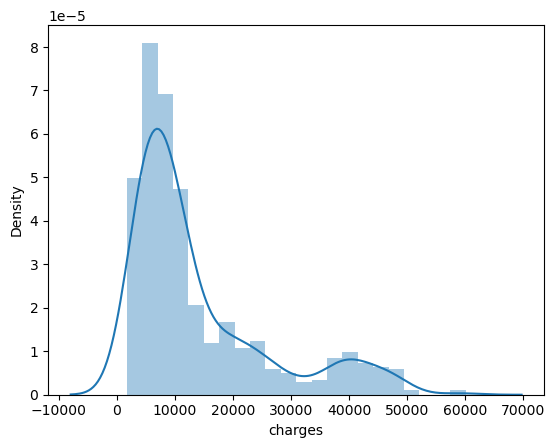

In [42]:
#charges distribution for people with children
sns.distplot(df[df['children']>0]['charges'])


In [43]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'smoker_numeric'],
      dtype='object')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int32  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int32  
 5   region          1338 non-null   int32  
 6   charges         1338 non-null   float64
 7   smoker_numeric  1338 non-null   int64  
dtypes: float64(2), int32(3), int64(3)
memory usage: 68.1 KB


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

X = df.drop(['smoker'], axis=1)
y = df['smoker']

#splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#creating a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

#predicting the test data
y_pred = lr.predict(X_test)

#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred))
print('MSE: ', mean_squared_error(y_test, y_pred))


R2 score:  1.0
MSE:  2.2828276055999324e-25


In [46]:
print(lr.score(X_test,y_test))


1.0


Accuracy of logistic regression classifier on test set: 0.99
Precision of logistic regression classifier on test set: 0.98
Recall of logistic regression classifier on test set: 0.98
F1-score of logistic regression classifier on test set: 0.98
F-beta score of logistic regression classifier on test set: 0.98
F-beta score of logistic regression classifier on test set: 0.98
AUC of logistic regression classifier on test set: 1.00
[[215   1]
 [  1  51]]


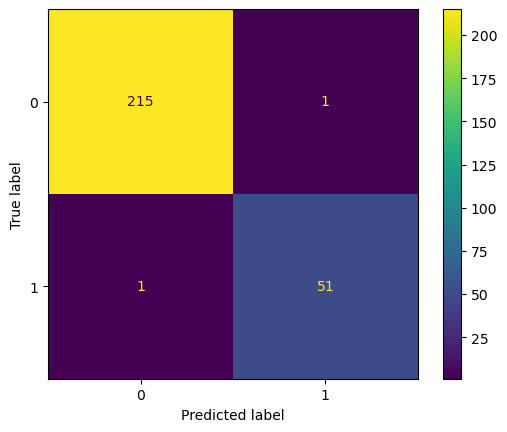

In [50]:
#logistic regression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import fbeta_score
from sklearn.metrics import precision_recall_fscore_support

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:,1]

print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Precision of logistic regression classifier on test set: {:.2f}'.format(precision_score(y_test, y_pred)))
print('Recall of logistic regression classifier on test set: {:.2f}'.format(recall_score(y_test, y_pred)))
print('F1-score of logistic regression classifier on test set: {:.2f}'.format(f1_score(y_test, y_pred)))
print('F-beta score of logistic regression classifier on test set: {:.2f}'.format(fbeta_score(y_test, y_pred, beta=0.5)))
print('F-beta score of logistic regression classifier on test set: {:.2f}'.format(fbeta_score(y_test, y_pred, beta=2)))
print('AUC of logistic regression classifier on test set: {:.2f}'.format(roc_auc_score(y_test, y_pred_proba)))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot()

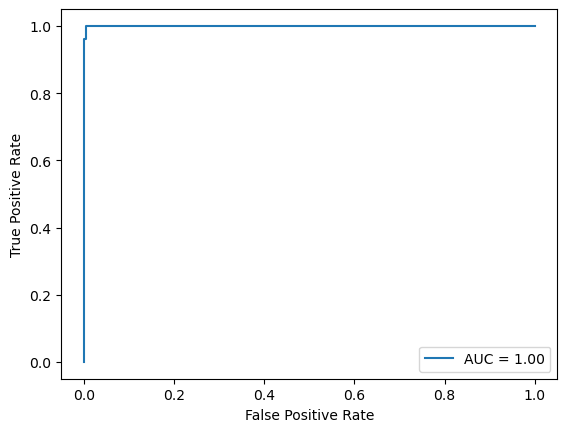

In [51]:
#roc curve
disp = RocCurveDisplay(fpr=roc_curve(y_test, y_pred_proba)[0], tpr=roc_curve(y_test, y_pred_proba)[1], roc_auc=roc_auc_score(y_test, y_pred_proba))
disp.plot()


In [52]:
#creating a polynomial regression model
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train)
poly.fit(X_poly, y_train)
lr2 = LinearRegression()
lr2.fit(X_poly, y_train)
#predicting the test data
y_pred2 = lr2.predict(poly.fit_transform(X_test))
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred2))
print('MSE: ', mean_squared_error(y_test, y_pred2))


R2 score:  0.9999999999647681
MSE:  5.509650092813467e-12


In [53]:
#creating a random forest regression model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)
#predicting the test data
y_pred3 = rf.predict(X_test)
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred3))
print('MSE: ', mean_squared_error(y_test, y_pred3))


R2 score:  1.0
MSE:  0.0


In [54]:
#creating a random forest regression model with 1000 estimators
rf2 = RandomForestRegressor(n_estimators=1000)
rf2.fit(X_train, y_train)
#predicting the test data
y_pred4 = rf2.predict(X_test)
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred4))
print('MSE: ', mean_squared_error(y_test, y_pred4))


R2 score:  1.0
MSE:  0.0


In [55]:
#creating a random forest regression model with 1000 estimators and max depth of 5
rf3 = RandomForestRegressor(n_estimators=1000, max_depth=5)
rf3.fit(X_train, y_train)
#predicting the test data
y_pred5 = rf3.predict(X_test)
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred5))
print('MSE: ', mean_squared_error(y_test, y_pred5))


R2 score:  1.0
MSE:  0.0


In [56]:
#creating a random forest regression model with 1000 estimators and max depth of 10
rf4 = RandomForestRegressor(n_estimators=1000, max_depth=10)
rf4.fit(X_train, y_train)
#predicting the test data
y_pred6 = rf4.predict(X_test)
#calculating the r2 score and mse
print('R2 score: ', r2_score(y_test, y_pred6))
print('MSE: ', mean_squared_error(y_test, y_pred6))


R2 score:  1.0
MSE:  0.0


In [57]:
#XGBoost
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))
#r2 score
r2_score(y_test, preds)
#mse
mean_squared_error(y_test, preds)
print("R2 score: ", r2_score(y_test, preds))
print("MSE: ", mean_squared_error(y_test, preds))


RMSE: 0.089359
R2 score:  0.9489393534484576
MSE:  0.007984979701310485


In [58]:
#lightgbm

import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                early_stopping_rounds=5)

# predict
y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)

# eval
print('The rmse of prediction is:', mean_squared_error(y_test, y_pred) ** 0.5)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000347 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's l1: 0.304944	valid_0's l2: 0.141298
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's l1: 0.289696	valid_0's l2: 0.127522
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's l1: 0.275212	valid_0's l2: 0.115088
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's l1: 0.261451	valid_0's l2: 0.103867
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's l1: 0.248378	valid_0's l2: 0.0937401
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's l1: 0.235959	valid_0's l2: 0.0846004
[LightGBM] [Warning] No

d:\python\odyn\anak2\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "


In [59]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor ,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import xgboost as xgb
from catboost import CatBoostRegressor
import lightgbm as lgb
from sklearn.linear_model import LinearRegression

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR(),
    'XGBoost': xgb.XGBRegressor(),
    'LightGBM': lgb.LGBMRegressor(),
    'Gradient Boosting Regressor' : GradientBoostingRegressor(),
    'ADA Boost' : AdaBoostRegressor(),
    'K Neighbors Regressor' : KNeighborsRegressor(),
    'Linear SVR' : LinearSVR(),
    'Cat Boost Regressor' : CatBoostRegressor(),
}

In [60]:
Name = ['Linear Regression','Decision Tree','Random Forest','SVR','XGBoost','LightGBM','Gradient Boosting Regressor' ,'ADA Boost' ,'K Neighbors Regressor','Linear SVR','Cat Boost Regressor']
accuracy = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"Results for {name}:")
    print("Mean Squared Error (MSE):", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("R-squared Score:", r2)
    accuracy.append(r2)
    print()

Results for Linear Regression:
Mean Squared Error (MSE): 2.2828276055999324e-25
Mean Absolute Error (MAE): 3.6231411146835033e-13
R-squared Score: 1.0

Results for Decision Tree:
Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared Score: 1.0

Results for Random Forest:
Mean Squared Error (MSE): 0.0
Mean Absolute Error (MAE): 0.0
R-squared Score: 1.0

Results for SVR:
Mean Squared Error (MSE): 0.07132615685553585
Mean Absolute Error (MAE): 0.1495101570619906
R-squared Score: 0.5438986921303413

Results for XGBoost:
Mean Squared Error (MSE): 7.205075160296121e-10
Mean Absolute Error (MAE): 2.1775611973829817e-05
R-squared Score: 0.999999995392652

Results for LightGBM:
Mean Squared Error (MSE): 1.1045650227701953e-10
Mean Absolute Error (MAE): 8.526027807418409e-06
R-squared Score: 0.9999999992936763

Results for Gradient Boosting Regressor:
Mean Squared Error (MSE): 1.1045649416027453e-10
Mean Absolute Error (MAE): 8.52602749616588e-06
R-squared Score: 0.9999999992936

d:\python\odyn\anak2\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0:	learn: 0.3893522	total: 147ms	remaining: 2m 26s
1:	learn: 0.3743828	total: 149ms	remaining: 1m 14s
2:	learn: 0.3607313	total: 150ms	remaining: 49.9s
3:	learn: 0.3487400	total: 151ms	remaining: 37.7s
4:	learn: 0.3357688	total: 153ms	remaining: 30.4s
5:	learn: 0.3230351	total: 154ms	remaining: 25.5s
6:	learn: 0.3108765	total: 156ms	remaining: 22.1s
7:	learn: 0.2984666	total: 156ms	remaining: 19.4s
8:	learn: 0.2866738	total: 157ms	remaining: 17.3s
9:	learn: 0.2763915	total: 158ms	remaining: 15.7s
10:	learn: 0.2656935	total: 160ms	remaining: 14.3s
11:	learn: 0.2551910	total: 160ms	remaining: 13.2s
12:	learn: 0.2452857	total: 162ms	remaining: 12.3s
13:	learn: 0.2355752	total: 162ms	remaining: 11.4s
14:	learn: 0.2272820	total: 164ms	remaining: 10.7s
15:	learn: 0.2181897	total: 164ms	remaining: 10.1s
16:	learn: 0.2098278	total: 165ms	remaining: 9.57s
17:	learn: 0.2025439	total: 167ms	remaining: 9.1s
18:	learn: 0.1942673	total: 167ms	remaining: 8.63s
19:	learn: 0.1867933	total: 168ms	remain

In [61]:
accuracy

[1.0,
 1.0,
 1.0,
 0.5438986921303413,
 0.999999995392652,
 0.9999999992936763,
 0.9999999992936763,
 1.0,
 0.5886467236467237,
 0.5852584263731738,
 0.9999224032121538]

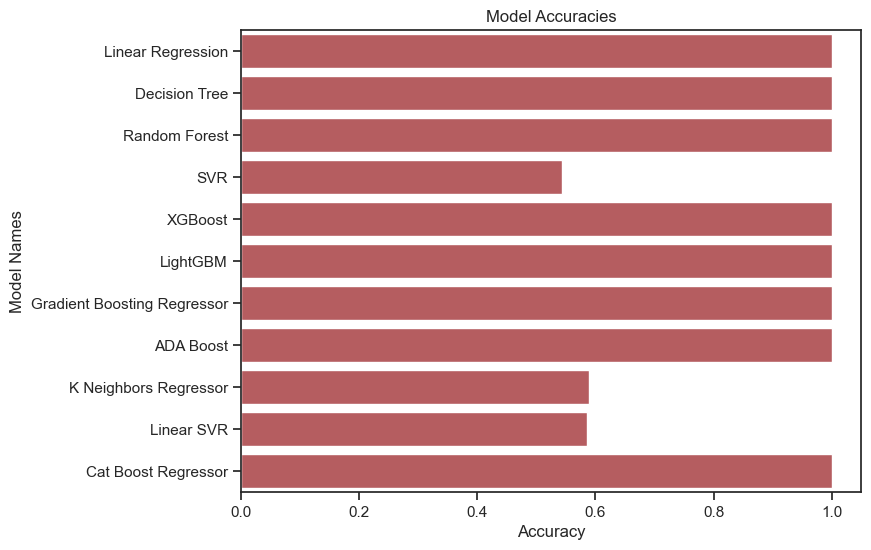

In [62]:
data = pd.DataFrame({"Names": Name, "Accuracies": accuracy})

sns.set(style="ticks")
plt.figure(figsize=(8, 6))

sns.barplot(x="Accuracies", y="Names", data=data, color="r")

plt.xlabel("Accuracy")
plt.ylabel("Model Names")
plt.title("Model Accuracies")

plt.show()

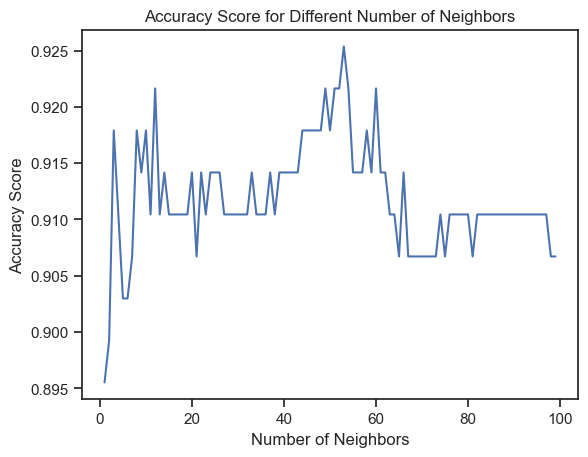

In [66]:
#create a function that checks for the best amount of neighbors
from sklearn.neighbors import KNeighborsClassifier
def check_neighbors(X_train, y_train, X_test, y_test, k):
    #create a list of scores
    scores = []
    #create a list of neighbors
    neighbors = []
    #create a for loop that goes through the range of k
    for i in range(1, k):
        #create a KNN classifier with the current k
        knn = KNeighborsClassifier(n_neighbors=i)
        #fit the model
        knn.fit(X_train, y_train)
        #append the score to the scores list
        scores.append(knn.score(X_test, y_test))
        #append the current k to the neighbors list
        neighbors.append(i)
    #return the scores and neighbors list
    return scores, neighbors

#call the function
scores, neighbors = check_neighbors(X_train, y_train, X_test, y_test, 100)

#plot the scores
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score for Different Number of Neighbors')
plt.show()


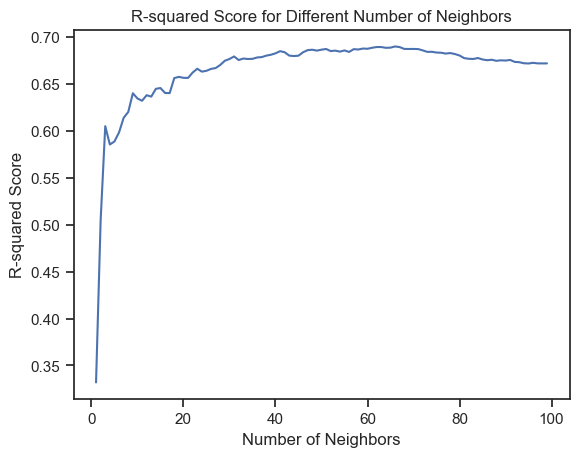

In [65]:
from sklearn.neighbors import KNeighborsRegressor

def check_neighbors(X_train, y_train, X_test, y_test, k):
    scores = []
    neighbors = []
    
    for i in range(1, k):
        knn = KNeighborsRegressor(n_neighbors=i)  # Use KNeighborsRegressor
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
        neighbors.append(i)
        
    return scores, neighbors

scores, neighbors = check_neighbors(X_train, y_train, X_test, y_test, 100)
plt.plot(neighbors, scores)
plt.xlabel('Number of Neighbors')
plt.ylabel('R-squared Score')  # Since it's a regression task
plt.title('R-squared Score for Different Number of Neighbors')
plt.show()